# Projet R scoring

In [77]:
# dl 
list.of.packages= c("naniar", "ggplot", "gridExtra")
install.packages(list.of.packages)

# import
library(gridExtra)
library(naniar)

Warning message:
"package 'ggplot' is not available (for R version 3.6.1)"Warning message:
"package 'naniar' is in use and will not be installed"

package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Wenceslas\AppData\Local\Temp\RtmpWoNJby\downloaded_packages


Warning message:
"package 'gridExtra' was built under R version 3.6.3"

In [12]:
# chemin pour le data
data= read.csv('data/hmeq.csv')
print(dim(data))
head(data)

[1] 5960   13


BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1,1100,25860,39025,HomeImp,Other,10.5,0,0,94.36667,1,9,NA
1,1300,70053,68400,HomeImp,Other,7.0,0,2,121.83333,0,14,NA
1,1500,13500,16700,HomeImp,Other,4.0,0,0,149.46667,1,10,NA
1,1500,NA,NA,,,NA,NA,NA,NA,NA,NA,NA
0,1700,97800,112000,HomeImp,Office,3.0,0,0,93.33333,0,14,NA
1,1700,30548,40320,HomeImp,Other,9.0,0,0,101.46600,1,8,37.11361


In [11]:
str(data)

'data.frame':	5960 obs. of  13 variables:
 $ BAD    : int  1 1 1 1 0 1 1 1 1 1 ...
 $ LOAN   : int  1100 1300 1500 1500 1700 1700 1800 1800 2000 2000 ...
 $ MORTDUE: num  25860 70053 13500 NA 97800 ...
 $ VALUE  : num  39025 68400 16700 NA 112000 ...
 $ REASON : Factor w/ 3 levels "","DebtCon","HomeImp": 3 3 3 1 3 3 3 3 3 3 ...
 $ JOB    : Factor w/ 7 levels "","Mgr","Office",..: 4 4 4 1 3 4 4 4 4 6 ...
 $ YOJ    : num  10.5 7 4 NA 3 9 5 11 3 16 ...
 $ DEROG  : int  0 0 0 NA 0 0 3 0 0 0 ...
 $ DELINQ : int  0 2 0 NA 0 0 2 0 2 0 ...
 $ CLAGE  : num  94.4 121.8 149.5 NA 93.3 ...
 $ NINQ   : int  1 0 1 NA 0 1 1 0 1 0 ...
 $ CLNO   : int  9 14 10 NA 14 8 17 8 12 13 ...
 $ DEBTINC: num  NA NA NA NA NA ...


BAD       LOAN    MORTDUE      VALUE     REASON        JOB        YOJ 
0.00000000 0.00000000 0.08691275 0.01879195 0.00000000 0.00000000 0.08640940 
     DEROG     DELINQ      CLAGE       NINQ       CLNO    DEBTINC 
0.11879195 0.09731544 0.05167785 0.08557047 0.03724832 0.21258389

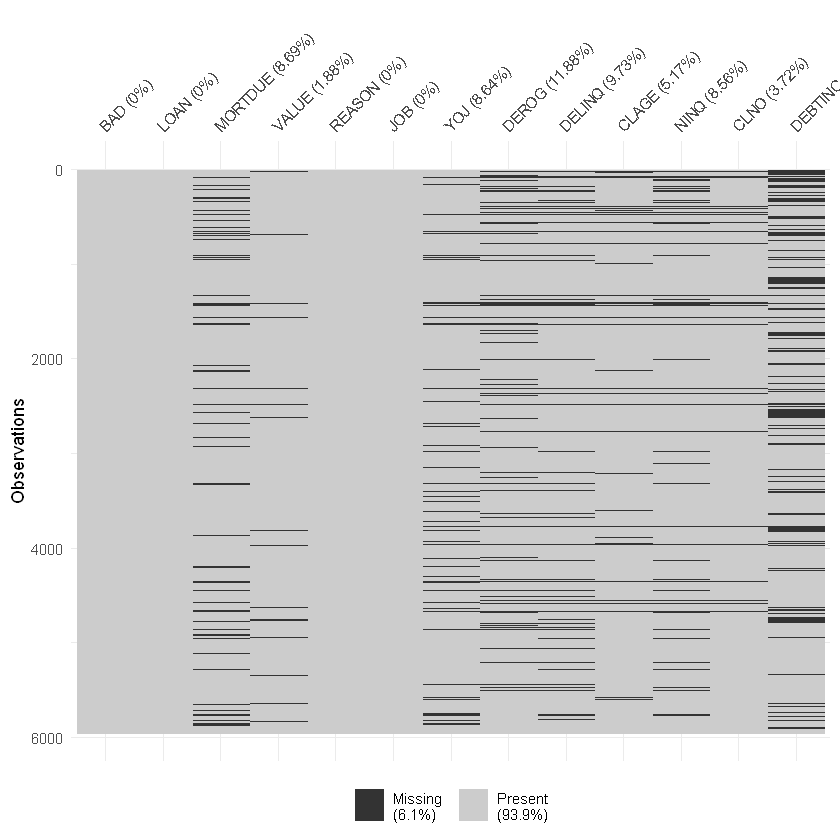

In [17]:
# valeurs manquantes
vis_miss(data, warn_large_data=F)

navar= colSums(is.na(data))/nrow(data) # taux de na dans les colonnes (variable)
navar

In [86]:
num= c("LOAN", "MORTDUE", "VALUE", "YOJ", "CLAGE", "CLNO", "DEBTINC")
quat= c("BAD", "REASON", "JOB", "DEROG", "DELINQ", "NINQ")

data_q= data[quat]
data_n= data[num]
str(data_q)
str(data_n)

'data.frame':	5960 obs. of  6 variables:
 $ BAD   : int  1 1 1 1 0 1 1 1 1 1 ...
 $ REASON: Factor w/ 3 levels "","DebtCon","HomeImp": 3 3 3 1 3 3 3 3 3 3 ...
 $ JOB   : Factor w/ 7 levels "","Mgr","Office",..: 4 4 4 1 3 4 4 4 4 6 ...
 $ DEROG : int  0 0 0 NA 0 0 3 0 0 0 ...
 $ DELINQ: int  0 2 0 NA 0 0 2 0 2 0 ...
 $ NINQ  : int  1 0 1 NA 0 1 1 0 1 0 ...
'data.frame':	5960 obs. of  7 variables:
 $ LOAN   : int  1100 1300 1500 1500 1700 1700 1800 1800 2000 2000 ...
 $ MORTDUE: num  25860 70053 13500 NA 97800 ...
 $ VALUE  : num  39025 68400 16700 NA 112000 ...
 $ YOJ    : num  10.5 7 4 NA 3 9 5 11 3 16 ...
 $ CLAGE  : num  94.4 121.8 149.5 NA 93.3 ...
 $ CLNO   : int  9 14 10 NA 14 8 17 8 12 13 ...
 $ DEBTINC: num  NA NA NA NA NA ...


Warning message:
"Removed 708 rows containing non-finite values (stat_count)."Warning message:
"Removed 580 rows containing non-finite values (stat_count)."Warning message:
"Removed 510 rows containing non-finite values (stat_count)."

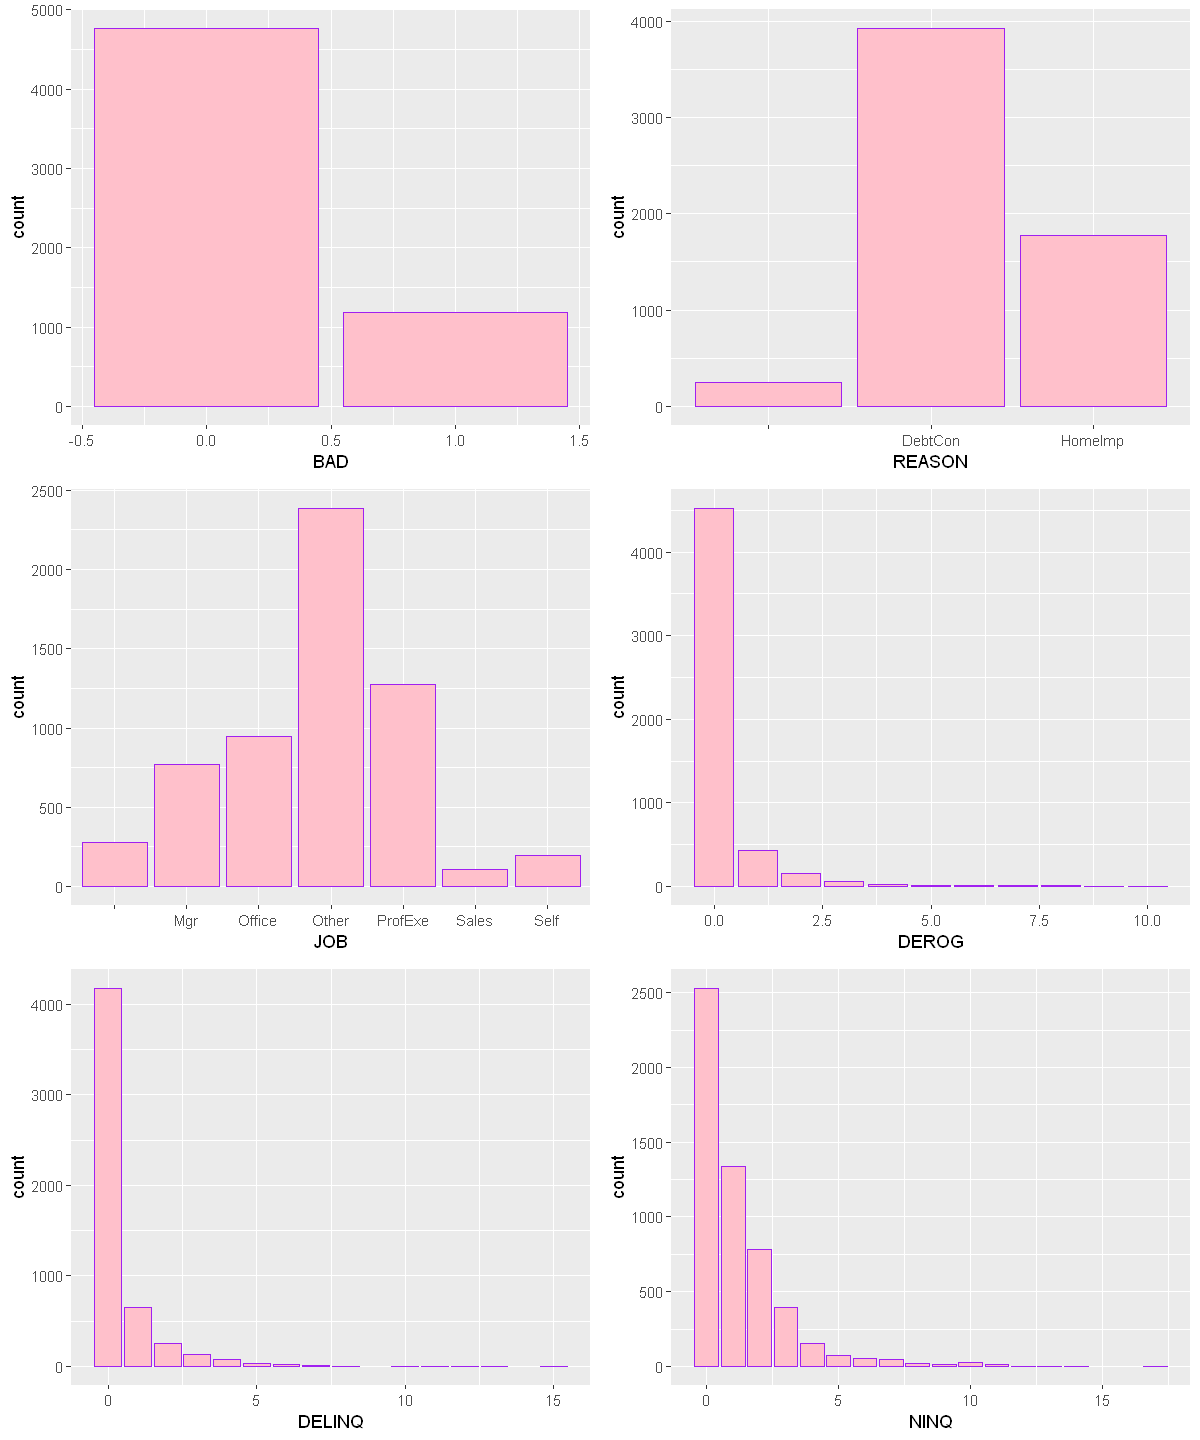

In [120]:
fig <- function(width, heigth){
     options(repr.plot.width= width, repr.plot.height= heigth)
}

bar_freq= function(data, variable_name){
    ploted= ggplot2::ggplot(as.data.frame(data)
                            , ggplot2::aes(data[, c(variable_name)])
                            , na.rm= T
                           ) +
    ggplot2::geom_bar(color= "purple", fill= "pink") +
#     ggplot2::ggtitle(variable_name) +
    ggplot2::xlab(variable_name)
#   print(ploted)
}

# par(mfrow=c(3, 2))
fig(10, 12)
# for (x in seq(1, length(quat)))
#     bar_freq(data_q, quat[x], x)
plot1= bar_freq(data_q, quat[1])
plot2= bar_freq(data_q, quat[2])
plot3= bar_freq(data_q, quat[3])
plot4= bar_freq(data_q, quat[4])
plot5= bar_freq(data_q, quat[5])
plot6= bar_freq(data_q, quat[6])

grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, ncol=2, nrow= 3)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 518 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 112 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 515 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 308 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 222 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1267 rows containing non-finite values (stat_bin)."

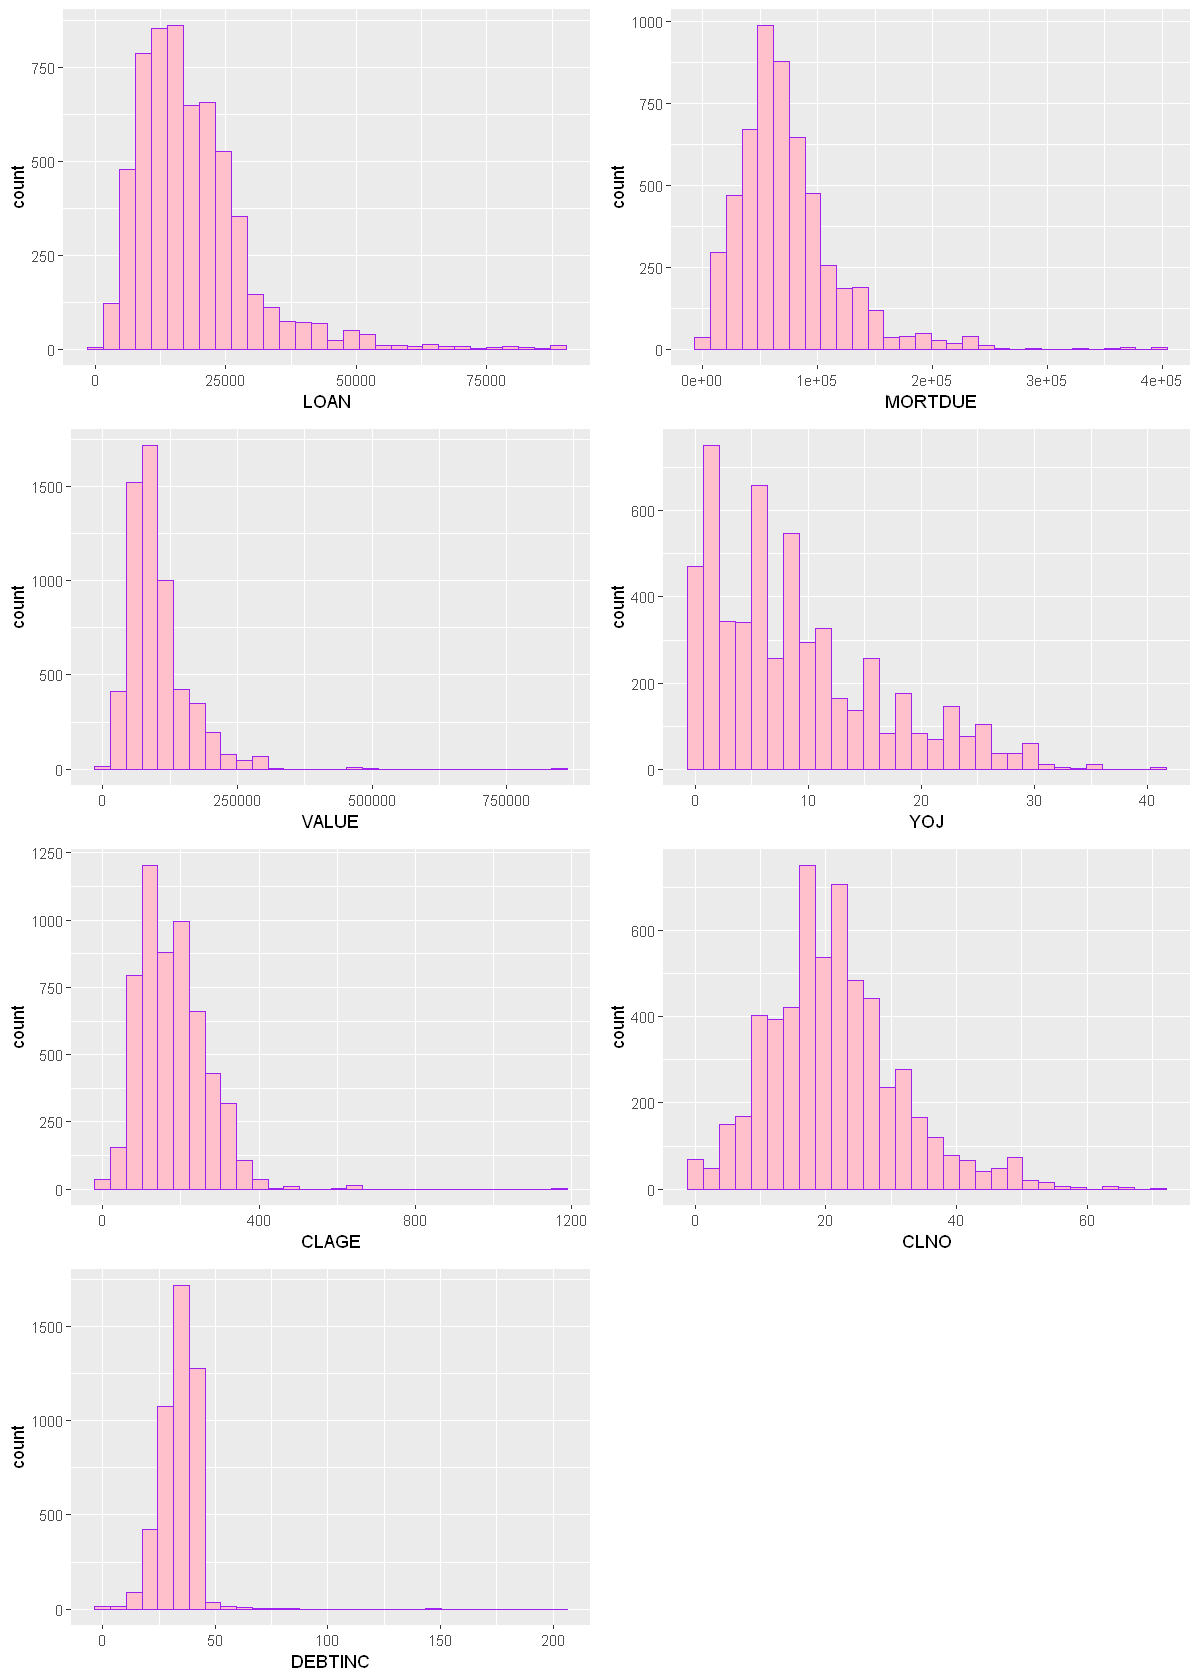

In [119]:
box_plot= function(data, variable_name){
    ploted= ggplot2::ggplot(as.data.frame(data)
                            , ggplot2::aes(x= data[, c(variable_name)])
                            , na.rm= T
                           ) +
    ggplot2::geom_histogram(col= "purple", fill= "pink") +
#     ggplot2::ggtitle(variable_name) +
    ggplot2::xlab(variable_name)
#   print(ploted)
}

fig(10, 14)

plot1= box_plot(data_n, num[1])
plot2= box_plot(data_n, num[2])
plot3= box_plot(data_n, num[3])
plot4= box_plot(data_n, num[4])
plot5= box_plot(data_n, num[5])
plot6= box_plot(data_n, num[6])
plot7= box_plot(data_n, num[7])


grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, ncol=2, nrow= 4)